In [1]:
# Import MNIST
from torchvision.datasets import CelebA
import cv2
import time
# dataset = CelebA('/scratch/sg7729/hpml_project/', download=True)

/ext3/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append('/scratch/sg7729/hpml_project/PD_GAN/')
# parser.add_argument('-f')

In [3]:

# !pip install loguru

import sys
sys.argv=['']


import sys
sys.argv
import argparse

parser = argparse.ArgumentParser()

parser.parse_args()
del sys

In [4]:
# Import MNIST
import pynvml
import pytorch_ssim
from skimage.metrics import structural_similarity as ssim


In [5]:
import torch
import torchvision.models as models
from torch.profiler import profile, record_function, ProfilerActivity

In [6]:

pynvml.nvmlInit()

# Get handle for GPU 0
handle = pynvml.nvmlDeviceGetHandleByIndex(0)

# Get power usage
power_usage = pynvml.nvmlDeviceGetPowerUsage(handle) / 1000.0  # convert to watts

# Get GPU utilization
utilization = pynvml.nvmlDeviceGetUtilizationRates(handle)
gpu_utilization = utilization.gpu

# Get fan speed
#fan_speed = pynvml.nvmlDeviceGetFanSpeed(handle)

# Get temperature
temperature = pynvml.nvmlDeviceGetTemperature(handle, pynvml.NVML_TEMPERATURE_GPU)

In [7]:
def ssim_fn(y_true, y_pred):
    ssim_val = 0
    for i in range(y_true.shape[0]):
        true_img = y_true[i, :, :, :]
        pred_img = y_pred[i, :, :, :]
        true_img = cv2.cvtColor(true_img.permute(1,2,0).detach().cpu().numpy(), cv2.COLOR_RGB2GRAY)
        pred_img = cv2.cvtColor(pred_img.permute(1,2,0).detach().cpu().numpy(), cv2.COLOR_RGB2GRAY)
        ssim_val += ssim(true_img, pred_img, data_range=255)
    return ssim_val / y_true.shape[0]

In [8]:
import os
import numpy as np
import time
from datetime import datetime
from config.train_config import TrainConfig
from data.dataprocess import Dataset
from models.models import create_model
from util.util import visualize_grid, mkdir
from torch.utils import data
from loguru import logger

basic_dir = os.path.dirname(os.path.realpath('__file__'))
import sys

sys.path.append(basic_dir)
if __name__ == "__main__":
    cfg = TrainConfig().create_config()
    result_save_base_dir = os.path.join(basic_dir, cfg.checkpoints_dir, cfg.name)
    logger.add(os.path.join(result_save_base_dir, cfg.log_dir, "train.log"))
    visual_save_base = os.path.join(result_save_base_dir, "visuals")
    mkdir(visual_save_base)
    if cfg.write_summary:
        from torch.utils.tensorboard import SummaryWriter

        writer = SummaryWriter(log_dir=os.path.join(result_save_base_dir, cfg.log_dir))
    logger.info("Define the dataset")
    dataset = Dataset(cfg.gt_root, cfg, mask_file=cfg.mask_root)
    iterator_train = data.DataLoader(
        dataset, batch_size=cfg.batchSize, shuffle=True, num_workers=cfg.num_workers
    )
    logger.info("Create model")
    model = create_model(cfg)
    total_steps = 0
    logger.info("Start training")


----------------- Config ---------------
                basic_dir: /scratch/sg7729/hpml_project/PD-GAN
                batchSize: 4                             
                    beta1: 0.0                           
          checkpoints_dir: checkpoints                   
           continue_train: False                         
             display_freq: 500                           
display_single_pane_ncols: 0                             
              epoch_count: 1                             
                 gan_mode: hinge                         
                  gpu_ids: 0                             
                  gt_root: /workspace/project-nas-10583/cvpr2020/data/valley
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
               input_nc_D: 6                             
                  isTrain: True                          	[defaul

2023-05-14 01:50:42.697 | INFO     | __main__:<module>:26 - Define the dataset


flist /scratch/sg7729/hpml_project/celeba/img_align_celeba/


2023-05-14 01:50:43.364 | INFO     | __main__:<module>:31 - Create model


images 202599
initialize network with normal


/scratch/sg7729/hpml_project/PD-GAN/models/network/networks.py:60: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, 0.0, gain)
/scratch/sg7729/hpml_project/PD-GAN/models/network/networks.py:72: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias.data, 0.0)
2023-05-14 01:50:51.456 | INFO     | models.PDGAN:__init__:24 - network PDGAN has been defined


initialize network with normal
initialize network with normal


2023-05-14 01:50:52.366 | INFO     | models.PDGAN:__init__:32 - network PConvEN has been defined and the pretrain model /scratch/sg7729/hpml_project/PD-GAN/2_net_EN.pth has been load
2023-05-14 01:50:52.367 | INFO     | models.PDGAN:__init__:37 - network PConvDE has been defined and the pretrain model /scratch/sg7729/hpml_project/PD-GAN/2_net_DE.pth has been load
/ext3/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/ext3/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
2023-

initialize network with normal
DataParallel(
  (module): SPDNormGenerator(
    (fc): Linear(in_features=256, out_features=16384, bias=True)
    (generated): ModuleList(
      (0): SPDNormGeneratorUnit(
        (block): SPDNormResnetBlock(
          (conv_0): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv_1): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv_s): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm_0): SPDNorm(
            (mlp_activate): Sequential(
              (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (1): ReLU()
            )
            (mlp_gamma): Conv2d(128, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (mlp_beta): Conv2d(128, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
          (norm_1): SPDNorm(
            (mlp_activate): Sequential(
              (0): Conv2d(3, 128,

In [9]:
def train(n_epoch):
    for epoch in range(cfg.epoch_count, cfg.niter + cfg.niter_decay + 1):
        epoch_start_time = time.time()
        epoch_iter = 0
        total_steps = 0
        for gt, mask in iterator_train:
            iter_start_time = time.time()
            total_steps += cfg.batchSize
            epoch_iter += cfg.batchSize
            model.set_input(mask, gt)
            model.optimize_parameters()

            # print loss and time for each iteration
            losses = model.get_current_errors()

            times.append(time.time() - iter_start_time)

            visual_dict = model.get_current_visuals()
            power_usage = pynvml.nvmlDeviceGetPowerUsage(handle) / 1000.0  # convert to watts
            utilization = pynvml.nvmlDeviceGetUtilizationRates(handle)
            gpu_utilization = utilization.gpu
            temperature = pynvml.nvmlDeviceGetTemperature(handle, pynvml.NVML_TEMPERATURE_GPU)
            power_list.append(power_usage)
            gpu_list.append(gpu_utilization)
            #fan_list.append(fan_speed)
            temp_list.append(temperature)
            mse = torch.mean((visual_dict['input_image'].data - visual_dict['fake_A'].data) ** 2)
            psnr = 20 * torch.log10(1 / torch.sqrt(mse))
            psnr_list.append(psnr.item())
            ssim_val=ssim_fn(visual_dict['input_image'], visual_dict['fake_A'])
            ssim_list.append(ssim_val)


            loss_info = f"ExpName: {cfg.name} \nEpoch: {epoch}, Iter: {epoch_iter}, Time: {time.time() - iter_start_time:.2f} sec \n"
            for k, v in losses.items():
                loss_info = loss_info + f"{k}: {v.item():.4f}, "
                if cfg.write_summary:
                    writer.add_scalar("train_loss/" + k, v, global_step=total_steps)
            logger.info(loss_info)
            losses_array.append(losses['Perceptual'].item())
            # save images every 10 steps
            if total_steps % 10 == 0:
                visual_dict = model.get_current_visuals()
                image_save_path = os.path.join(
                    visual_save_base, f"{total_steps:06}.jpg"
                )
                grid_image = visualize_grid(
                    visual_dict, image_save_path, return_gird=True
                )
                writer.add_image(
                    "train_images",
                    (grid_image / 255.0).astype(np.float32).transpose(2, 0, 1),
                    total_steps,
                )

            # save model every epoch
            if epoch_iter % len(iterator_train) == 0:
                save_info = "saving the model at the end of epoch {}, iters {}".format(
                    epoch, epoch_iter
                )
                logger.info(save_info)
                model.save_networks(epoch)

            if epoch_iter/n_epoch == 1:
                return

        logger.info(
            "End of epoch {} / {} \t Time Taken: {} sec".format(
                epoch, cfg.niter + cfg.niter_decay, time.time() - epoch_start_time
            )
        )
        model.update_learning_rate(epoch)
        if epoch_iter/n_epoch == 1:
            return


In [10]:

power_list=[]
temp_list=[]
gpu_list=[]
fan_list=[]
psnr_list=[]
ssim_list=[]
times = []
losses_array = []
n_epoch = 100

train(n_epoch * 8)
print('warmup')


/ext3/miniconda3/lib/python3.10/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2023-05-14 01:51:07.854 | INFO     | __main__:train:39 - ExpName: PDGAN-Training 
Epoch: 1, Iter: 4, Time: 10.01 sec 
Perceptual: 59.3581, GAN_Feat: 23.2248, Diversity: 15.4070, Generator: -3.9093, Discriminator: 4.5010, 
2023-05-14 01:51:08.369 | INFO     | __main__:train:39 - ExpName: PDGAN-Training 
Epoch: 1, Iter: 8, Time: 0.51 sec 
Perceptual: 107.1841, GAN_Feat: 23.1628, Diversity: 804.9923, Generator: -3.2281, Discriminator: 15.2464, 
2023-05-14 01:51:08.844 | INFO     | __main__:train:39 - ExpName: PDGAN-Training 
Epoch: 1, Iter: 12, Time: 0.47 sec 
Perceptual: 76.2792, GAN_Feat: 18.1899, Diversity: 62.0348, Generator: -0.5847, Discriminator: 16.6298, 
2023-05-14 01:51:09.318 | INFO     | __main__:train:39 - ExpName: PDGAN-Training 
Epoch: 1, Iter: 16, Time: 

warmup


In [11]:
with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA], record_shapes=True, profile_memory=True) as prof:
    train(1 * 8)
#print(f"Epoch {0}: {prof.key_averages().memory_bandwidth}")
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))
  #analyze the profiling results
print(prof.key_averages().table(sort_by="self_cuda_time_total", row_limit=10))

STAGE:2023-05-14 01:53:21 3625849:3625849 ActivityProfilerController.cpp:294] Completed Stage: Warm Up
[W CPUAllocator.cpp:231] Memory block of unknown size was allocated before the profiling started, profiler results will not include the deallocation event
2023-05-14 01:53:22.332 | INFO     | __main__:train:39 - ExpName: PDGAN-Training 
Epoch: 1, Iter: 4, Time: 0.55 sec 
Perceptual: 25.8209, GAN_Feat: 6.9317, Diversity: 3.2395, Generator: 0.8366, Discriminator: 4.6907, 
2023-05-14 01:53:22.838 | INFO     | __main__:train:39 - ExpName: PDGAN-Training 
Epoch: 1, Iter: 8, Time: 0.50 sec 
Perceptual: 23.1773, GAN_Feat: 6.8708, Diversity: 4.8227, Generator: 0.5968, Discriminator: 4.2459, 
STAGE:2023-05-14 01:53:23 3625849:3625849 ActivityProfilerController.cpp:300] Completed Stage: Collection


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                       cudaLaunchKernel        35.67%     383.928ms        35.67%     383.928ms      27.653us     123.934ms        13.56%     123.936ms       8.927us           0 b           0 b        -512 b        -512 

In [12]:
EN = model.netEN
DE = model.netDE
PD = model.netPDGAN

In [13]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())


In [14]:
num_params = count_parameters(EN)

print(f"The Encoeder has {num_params:,} trainable parameters.")

num_params = count_parameters(DE)

print(f"The Decoder has {num_params:,} trainable parameters.")



The Encoeder has 60,039,936 trainable parameters.
The Decoder has 18,098,499 trainable parameters.


In [15]:
num_params = count_parameters(PD)

print(f"The PDGAN has {num_params:,} trainable parameters.")

The PDGAN has 186,007,263 trainable parameters.


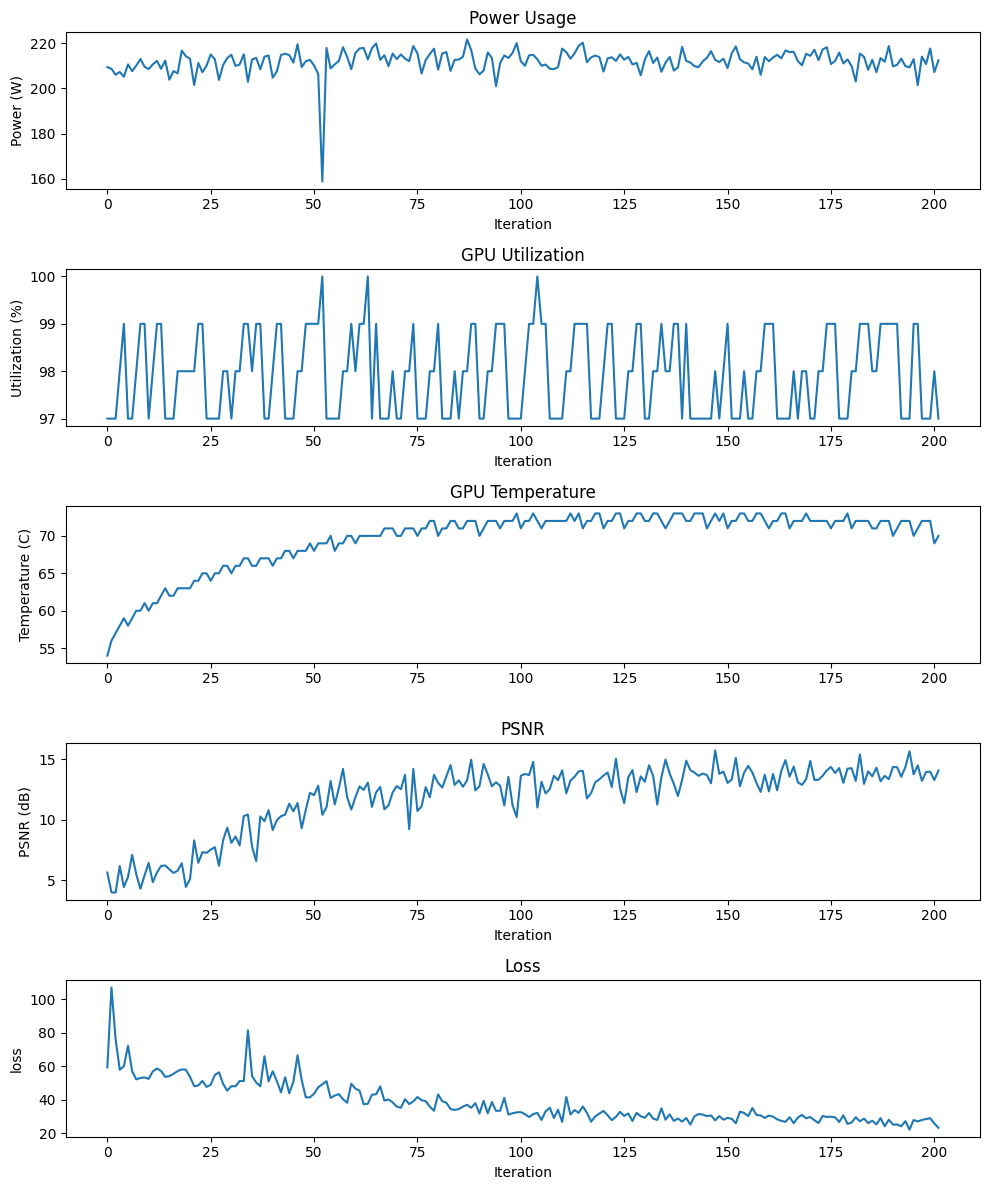

In [16]:
import matplotlib.pyplot  as plt
# create a figure with 4 subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 12))

# plot power usage
axs[0].plot(power_list)
axs[0].set_title('Power Usage')
axs[0].set_ylabel('Power (W)')
axs[0].set_xlabel('Iteration')

# plot GPU utilization
axs[1].plot(gpu_list)
axs[1].set_title('GPU Utilization')
axs[1].set_ylabel('Utilization (%)')
axs[1].set_xlabel('Iteration')

# plot temperature
axs[2].plot(temp_list)
axs[2].set_title('GPU Temperature')
axs[2].set_ylabel('Temperature (C)')

# plot PSNR
axs[3].plot(psnr_list)
axs[3].set_title('PSNR')
axs[3].set_xlabel('Iteration')
axs[3].set_ylabel('PSNR (dB)')

# plot SSIM
axs[4].plot(losses_array)
axs[4].set_title('Loss')
axs[4].set_xlabel('Iteration')
axs[4].set_ylabel('loss')

# set the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

In [17]:
dmem_params = sum([param.nelement()*param.element_size() for param in EN.parameters()])
dmem_bufs = sum([buf.nelement()*buf.element_size() for buf in EN.buffers()])
dmem = dmem_params + dmem_bufs # in bytes
print(dmem)

240159744


In [18]:
gmem_params = sum([param.nelement()*param.element_size() for param in DE.parameters()])
gmem_bufs = sum([buf.nelement()*buf.element_size() for buf in DE.buffers()])
gmem = gmem_params + gmem_bufs # in bytes
print(gmem)

72393996


In [19]:
pmem_params = sum([param.nelement()*param.element_size() for param in DE.parameters()])
pmem_bufs = sum([buf.nelement()*buf.element_size() for buf in DE.buffers()])
pmem = pmem_params + gmem_bufs # in bytes
print(pmem)

72393996


In [20]:
mem = dmem + gmem + pmem
print(mem)

384947736


In [21]:
bandwidth=mem/(times[-1] * 1000000000)
print(bandwidth)

0.8185825774826464


In [22]:
flop=2*count_parameters(EN)+count_parameters(DE)+count_parameters(PD)
print(flop)

324185634


In [23]:
flops=flop/(times[-1] * 1000000000)
print(flops)

0.6893733539520437


In [24]:
roofline=[bandwidth,flops]

In [25]:
import pickle


# Save the lists to a file
with open('v100lists_PDGAN_loss.pkl', 'wb') as f:
    pickle.dump([power_list, gpu_list, temp_list, psnr_list, ssim_list, times, roofline, losses_array], f)

In [26]:
!nvidia-smi

Sun May 14 01:53:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:1A:00.0 Off |                    0 |
| N/A   61C    P0    78W / 300W |  16075MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------